# 신용카드 유저 이탈 예측 및 마케팅 세그먼트 분석

2023.12.21

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 신용카드 유저 이탈 예측 및 마케팅 세그먼트 분석
- 설명: 신용카드 데이터셋을 통해 이탈 유저들의 특성을 통계적으로 파악하고, 마케팅 세그먼트를 도출하는 프로젝트
- 사용한 데이터셋
    - [Credit Card customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers): 나이, 급여, 결혼 여부, 신용카드 한도, 신용카드 카테고리 등 고객 1만 명에 대한 신용카드 데이터셋
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from scipy import stats

In [26]:
card_df = pd.read_csv('BankChurners.csv')
card_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [27]:
card_df = card_df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], axis=1)

card_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [28]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [29]:
card_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 2-2. 데이터 분포 확인 및 전처리

In [30]:
card_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

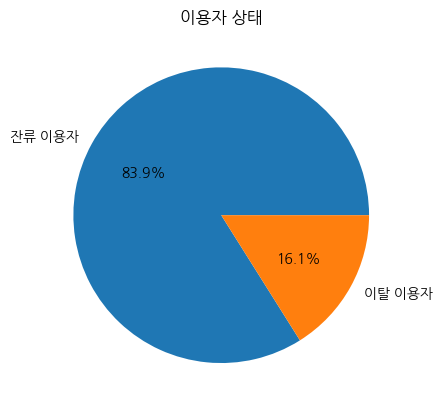

In [19]:
plt.pie(
    card_df['Attrition_Flag'].value_counts(),
    labels=card_df['Attrition_Flag'].value_counts().index.map({
        'Existing Customer': '잔류 이용자',
        'Attrited Customer': '이탈 이용자'
    }),
    autopct='%.1f%%'
)

plt.title('이용자 상태')

plt.show()

In [31]:
card_df['Attrition_Flag_Binary'] = card_df['Attrition_Flag'].map({
    'Existing Customer': 0, #잔류
    'Attrited Customer': 1  #이탈
})

card_df[['Attrition_Flag', 'Attrition_Flag_Binary']]

,Attrition_Flag,Attrition_Flag_Binary
0,Existing Customer,0
1,Existing Customer,0
2,Existing Customer,0
3,Existing Customer,0
4,Existing Customer,0
...,...,...
10122,Existing Customer,0
10123,Attrited Customer,1
10124,Attrited Customer,1
10125,Attrited Customer,1


In [33]:
card_df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

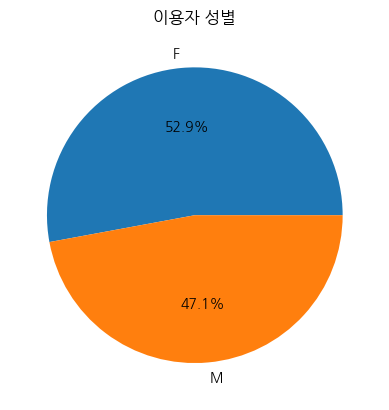

In [35]:
plt.pie(
    card_df['Gender'].value_counts(),
    labels=card_df['Gender'].value_counts().index,
    autopct='%.1f%%'
)

plt.title('이용자 성별')

plt.show()

In [34]:
card_df['Gender_Binary'] = card_df['Gender'].map({
    'M': 0,
    'F': 1
})

card_df[['Gender', 'Gender_Binary']]

,Gender,Gender_Binary
0,M,0
1,F,1
2,M,0
3,F,1
4,M,0
...,...,...
10122,M,0
10123,M,0
10124,F,1
10125,M,0


In [39]:
card_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Binary,Gender_Binary
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0


In [41]:
card_df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [40]:
card_df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [42]:
card_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [32]:
card_df.corr()

C:\Users\louis\AppData\Local\Temp\ipykernel_3564\3211362814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  card_df.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Binary
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046430
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018203
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.018991
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013687
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.150005
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.152449
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.204491
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023873
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263053
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000285


C:\Users\louis\AppData\Local\Temp\ipykernel_3564\4224403505.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = np.abs(card_df.corr())


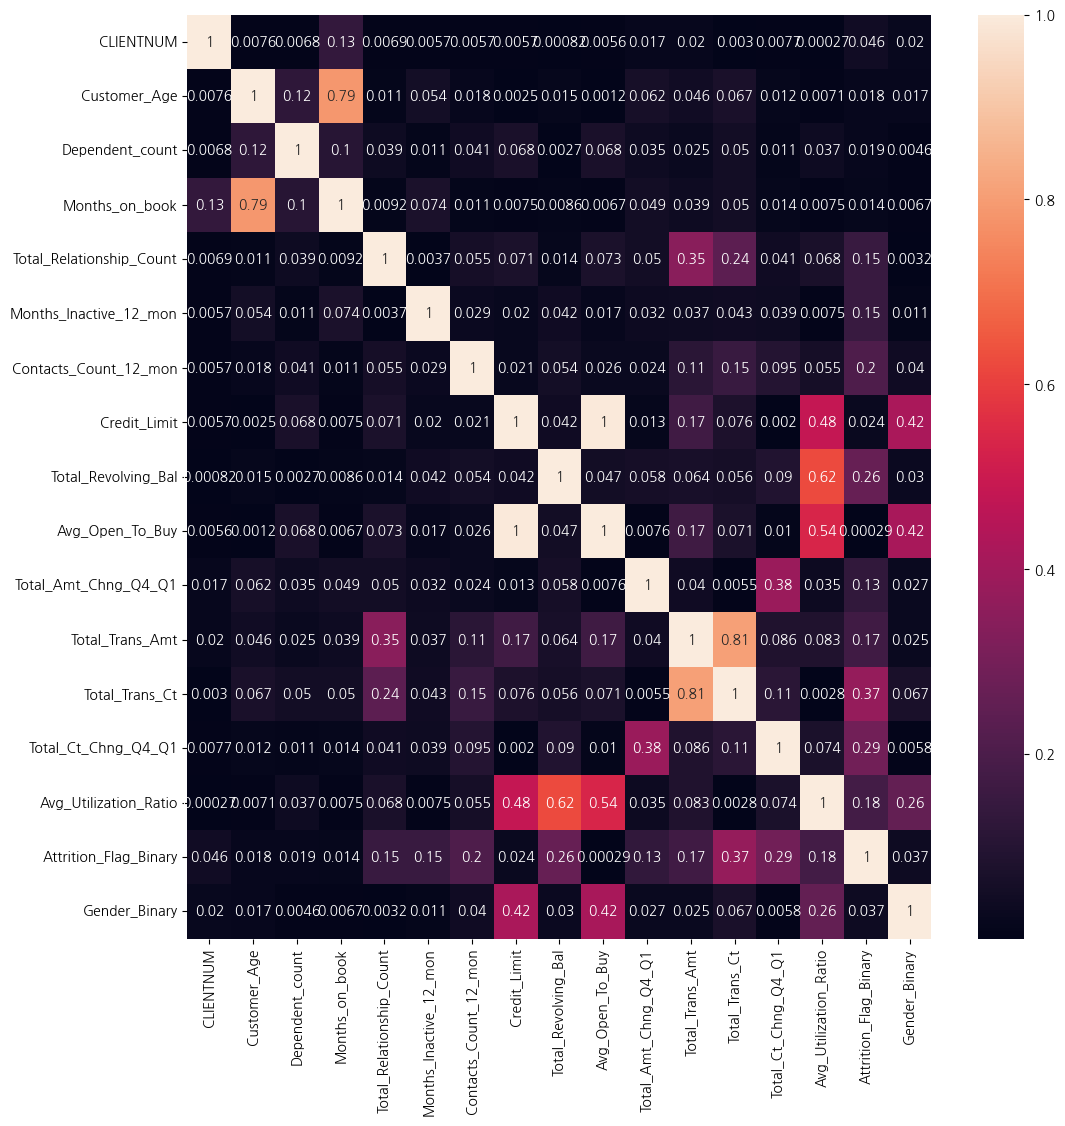

In [75]:
plt.figure(figsize=(12, 12))
corr_df = np.abs(card_df.corr())
sns.heatmap(corr_df, annot=True)
plt.show()

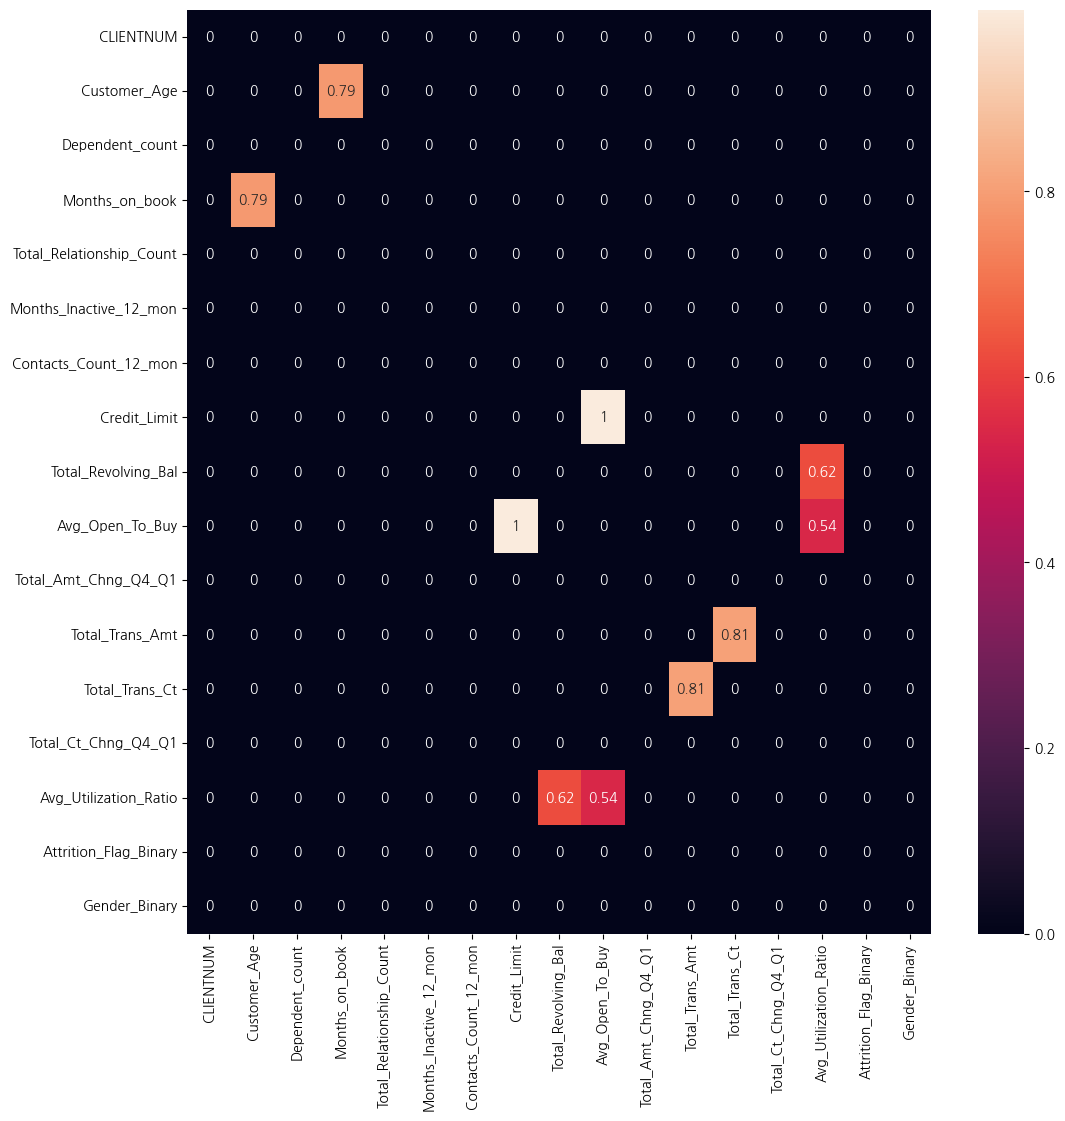

In [76]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_df[(corr_df >= 0.5) & (corr_df < 1)].fillna(0),
    annot=True
)
plt.show()

---

## 3. 데이터 분석

### 3-1. 문제 정의

본 분석의 목적은 **이탈 고객의 특성**을 파악하는 것이 목적이다.

이를 위해, Categorical 변수에 대해 groupby를 수행한 뒤 **이탈율에 대한 t검정**을 수행한다.

### 3-2. 가설 검정

#### 3-2-1. 학위에 따른 이탈율

In [60]:
for idx, df in iter(card_df.groupby(['Education_Level'])):
    print('=' * 50)
    print(idx)
    print(df['Attrition_Flag_Binary'].value_counts(normalize=True))

College
0    0.847976
1    0.152024
Name: Attrition_Flag_Binary, dtype: float64
Doctorate
0    0.789357
1    0.210643
Name: Attrition_Flag_Binary, dtype: float64
Graduate
0    0.844309
1    0.155691
Name: Attrition_Flag_Binary, dtype: float64
High School
0    0.847988
1    0.152012
Name: Attrition_Flag_Binary, dtype: float64
Post-Graduate
0    0.821705
1    0.178295
Name: Attrition_Flag_Binary, dtype: float64
Uneducated
0    0.840619
1    0.159381
Name: Attrition_Flag_Binary, dtype: float64
Unknown
0    0.831468
1    0.168532
Name: Attrition_Flag_Binary, dtype: float64


C:\Users\louis\AppData\Local\Temp\ipykernel_3564\649965077.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in iter(card_df.groupby(['Education_Level'])):


학력이 Doctorate(박사)인 경우 이탈율이 유독 높다.
- $H_0$: '박사 이탈율'과 '그 외의 이탈율'에는 차이가 없다.
- $H_1$: '박사 이탈율'이 '그 외의 이탈율'보다 유의미하게 높다.

In [61]:
doctorate_df = card_df[card_df['Education_Level'] == 'Doctorate']
non_doctorate_df = card_df[card_df['Education_Level'] != 'Doctorate']

doctorate_df.shape, non_doctorate_df.shape

((451, 23), (9676, 23))

In [64]:
statistic, p_value = stats.levene(
    doctorate_df['Attrition_Flag_Binary'],
    non_doctorate_df['Attrition_Flag_Binary']
)

alpha = 0.05
if p_value < alpha:
    print("등분산 가정 만족하지 않음")
else:
    print("등분산 가정 만족")

등분산 가정 만족하지 않음


In [66]:
statistic, p_value = stats.ttest_ind(
    doctorate_df['Attrition_Flag_Binary'],
    non_doctorate_df['Attrition_Flag_Binary'],
    equal_var=False,
    alternative='greater'
)

alpha = 0.05
if p_value < alpha:
    print("박사 이탈율이 그 외의 이탈율보다 유의미하게 높다.")
else:
    print("박사 이탈율과 그 외의 이탈율에는 차이가 없다.")

박사 이탈율이 그 외의 이탈율보다 유의미하게 높다.


#### 3-2-2. 결혼 여부에 따른 이탈율

In [77]:
for idx, df in iter(card_df.groupby(['Marital_Status'])):
    print('=' * 50)
    print(idx)
    print(df['Attrition_Flag_Binary'].value_counts(normalize=True))

Divorced
0    0.838235
1    0.161765
Name: Attrition_Flag_Binary, dtype: float64
Married
0    0.848731
1    0.151269
Name: Attrition_Flag_Binary, dtype: float64
Single
0    0.830586
1    0.169414
Name: Attrition_Flag_Binary, dtype: float64
Unknown
0    0.82777
1    0.17223
Name: Attrition_Flag_Binary, dtype: float64


C:\Users\louis\AppData\Local\Temp\ipykernel_3564\2577802033.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in iter(card_df.groupby(['Marital_Status'])):


결혼한 경우(Married)의 이탈율이 낮다.
- $H_0$: '결혼 이탈율'과 '그 외의 이탈율'에는 차이가 없다.
- $H_1$: '결혼 이탈율'이 '그 외의 이탈율'보다 유의미하게 낮다.

In [78]:
married_df = card_df[card_df['Marital_Status'] == 'Married']
non_married_df = card_df[card_df['Marital_Status'] != 'Married']

married_df.shape, non_married_df.shape

((4687, 23), (5440, 23))

In [79]:
statistic, p_value = stats.levene(
    married_df['Attrition_Flag_Binary'],
    non_married_df['Attrition_Flag_Binary']
)

alpha = 0.05
if p_value < alpha:
    print("등분산 가정 만족하지 않음")
else:
    print("등분산 가정 만족")

등분산 가정 만족하지 않음


In [85]:
statistic, p_value = stats.ttest_ind(
    married_df['Attrition_Flag_Binary'],
    non_married_df['Attrition_Flag_Binary'],
    equal_var=False,
    alternative='less'
)

alpha = 0.05
if p_value < alpha:
    print("결혼 이탈율이 그 외의 이탈율보다 유의미하게 낮다.")
else:
    print("결혼 이탈율과 그 외의 이탈율에는 차이가 없다.")

결혼 이탈율이 그 외의 이탈율보다 유의미하게 낮다.


#### 3.2.3. 수입에 따른 이탈율

In [81]:
for idx, df in iter(card_df.groupby(['Income_Category'])):
    print('=' * 50)
    print(idx)
    print(df['Attrition_Flag_Binary'].value_counts(normalize=True))

$120K +
0    0.826685
1    0.173315
Name: Attrition_Flag_Binary, dtype: float64
$40K - $60K
0    0.848603
1    0.151397
Name: Attrition_Flag_Binary, dtype: float64
$60K - $80K
0    0.865193
1    0.134807
Name: Attrition_Flag_Binary, dtype: float64
$80K - $120K
0    0.842345
1    0.157655
Name: Attrition_Flag_Binary, dtype: float64
Less than $40K
0    0.828138
1    0.171862
Name: Attrition_Flag_Binary, dtype: float64
Unknown
0    0.831835
1    0.168165
Name: Attrition_Flag_Binary, dtype: float64


C:\Users\louis\AppData\Local\Temp\ipykernel_3564\3389497175.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in iter(card_df.groupby(['Income_Category'])):


수입이 가장 적은 경우(Less than 40K)와 가장 많은 경우(120K +)의 이탈율이 높다.

첫 번째 가설 설정
- $H_0$: '저소득 이탈율'과 '그 외의 이탈율'에는 차이가 없다.
- $H_1$: '저소득 이탈율'이 '그 외의 이탈율'보다 유의미하게 높다.

두 번째 가설 설정
- $H_0$: '고소득 이탈율'과 '그 외의 이탈율'에는 차이가 없다.
- $H_1$: '고소득 이탈율'이 '그 외의 이탈율'보다 유의미하게 높다.

In [83]:
low_income_df = card_df[card_df['Income_Category'] == 'Less than $40K']
non_low_income_df = card_df[card_df['Income_Category'] != 'Less than $40K']

high_income_df = card_df[card_df['Income_Category'] == '$120K +']
non_high_income_df = card_df[card_df['Income_Category'] != '$120K +']

low_income_df.shape, non_low_income_df.shape, high_income_df.shape, non_high_income_df.shape

((3561, 23), (6566, 23), (727, 23), (9400, 23))

In [84]:
statistic, p_value = stats.levene(
    low_income_df['Attrition_Flag_Binary'],
    non_low_income_df['Attrition_Flag_Binary']
)

alpha = 0.05
if p_value < alpha:
    print("[저소득] 등분산 가정 만족하지 않음")
else:
    print("[저소득] 등분산 가정 만족")

statistic, p_value = stats.levene(
    high_income_df['Attrition_Flag_Binary'],
    non_high_income_df['Attrition_Flag_Binary']
)

alpha = 0.05
if p_value < alpha:
    print("[고소득] 등분산 가정 만족하지 않음")
else:
    print("[고소득] 등분산 가정 만족")

[저소득] 등분산 가정 만족하지 않음
[고소득] 등분산 가정 만족


In [87]:
statistic, p_value = stats.ttest_ind(
    low_income_df['Attrition_Flag_Binary'],
    non_low_income_df['Attrition_Flag_Binary'],
    equal_var=False,
    alternative='greater'
)

alpha = 0.05
if p_value < alpha:
    print("저소득 이탈율이 그 외의 이탈율보다 유의미하게 높다.")
else:
    print("저소득 이탈율과 그 외의 이탈율에는 차이가 없다.")

statistic, p_value = stats.ttest_ind(
    high_income_df['Attrition_Flag_Binary'],
    non_high_income_df['Attrition_Flag_Binary'],
    equal_var=True,
    alternative='greater'
)

alpha = 0.05
if p_value < alpha:
    print("고소득 이탈율이 그 외의 이탈율보다 유의미하게 높다.")
else:
    print("고소득 이탈율과 그 외의 이탈율에는 차이가 없다.")

저소득 이탈율이 그 외의 이탈율보다 유의미하게 높다.
고소득 이탈율과 그 외의 이탈율에는 차이가 없다.


#### 3-2-4. 카드 종류에 따른 이탈율

In [88]:
for idx, df in iter(card_df.groupby(['Card_Category'])):
    print('=' * 50)
    print(idx)
    print(df['Attrition_Flag_Binary'].value_counts(normalize=True))

Blue
0    0.839021
1    0.160979
Name: Attrition_Flag_Binary, dtype: float64
Gold
0    0.818966
1    0.181034
Name: Attrition_Flag_Binary, dtype: float64
Platinum
0    0.75
1    0.25
Name: Attrition_Flag_Binary, dtype: float64
Silver
0    0.852252
1    0.147748
Name: Attrition_Flag_Binary, dtype: float64


C:\Users\louis\AppData\Local\Temp\ipykernel_3564\844368848.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, df in iter(card_df.groupby(['Card_Category'])):


플래티넘 카드(Platinum)의 이탈율이 높다.
- $H_0$: '플래티넘 이탈율'과 '그 외의 이탈율'에는 차이가 없다.
- $H_1$: '플래티넘 이탈율'이 '그 외의 이탈율'보다 유의미하게 높다.

In [89]:
platinum_df = card_df[card_df['Card_Category'] == 'Platinum']
non_platinum_df = card_df[card_df['Card_Category'] != 'Platinum']

platinum_df.shape, non_platinum_df.shape

((20, 23), (10107, 23))

In [90]:
statistic, p_value = stats.levene(
    platinum_df['Attrition_Flag_Binary'],
    non_platinum_df['Attrition_Flag_Binary']
)

alpha = 0.05
if p_value < alpha:
    print("등분산 가정 만족하지 않음")
else:
    print("등분산 가정 만족")

등분산 가정 만족


In [91]:
statistic, p_value = stats.ttest_ind(
    platinum_df['Attrition_Flag_Binary'],
    non_platinum_df['Attrition_Flag_Binary'],
    equal_var=True,
    alternative='greater'
)

alpha = 0.05
if p_value < alpha:
    print("플래티넘 이탈율이 그 외의 이탈율보다 유의미하게 높다.")
else:
    print("플래티넘 이탈율과 그 외의 이탈율에는 차이가 없다.")

플래티넘 이탈율과 그 외의 이탈율에는 차이가 없다.


### 3-3. 결과 해석

이상의 결과를 요약하면 아래와 같다.
- 박사 학위자의 이탈율이 유의미하게 높다.
    - ...
- 기혼자의 이탈율이 유의미하게 낮다.
    - 결혼하여 가정을 꾸린 경우 경제적으로 안정화되고자 하는 경향이 강한 만큼, 섣불리 소비 패턴을 바꾸거나 하지는 않는 것으로 보인다.
    - 결혼 적령기이지만 아직 결혼하지 않은 잠재적 고객들을 포섭하는 데에 성공하면 Long-Tail Customer로 만들 수 있을 것으로 기대된다. 그러므로 이 segment에 대한 집중적 마케팅을 진행하는 것이 합리적이다.
- 저소득자의 이탈율이 유의미하게 높다.
    - 소득이 적은 경우 지출에 대한 안정성이 낮기 때문에 이탈율이 높은 것으로 보인다.
    - 만약 저소득자 고객들의 서비스 이용이 매출에 도움을 준다고 판단하는 경우, 저소득자 고객을 잠재적 이탈 가능 군집으로 분류하고, 저소득자 고객들을 위한 별도의 혜택을 제시한다(탈퇴 시 영구적으로 소멸되나, 이용 유지 시 지속적으로 제공되는 혜택).
    - 만약 저소득자 고객들의 서비스 이용이 매출에 도움을 주지 않는다고 판단하는 경우, 판촉에 있어서 후순위 군집으로 둔다. 이들에 대한 액션 아이템은 효율이 떨어질 공산이 크다. 공격적인 마케팅으로 고객을 끌어모았더라도 유지력이 떨어질 가능성이 크기 때문이다.

---

## 4. 후기

내용